<div class="alert alert-block alert-info">
<img src="https://secureservercdn.net/45.40.150.47/8jj.6f8.myftpupload.com/wp-content/uploads/2018/08/Pi-5-white-100x100-2.png" align="left" width="80" height="100">
<center>
    <h1><b><u>366pi Technologies</u></b></h1>
    <h2><br>Data Science Internship<br></h2>
    </center>    
    <div class="alert alert-block alert-success">
    <h2><b>Project:</b> Traffic Sign Detection</h2>
    <b>Dataset:</b><a href="https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign">Click to view Iris data.</a>
        <h2>Author:Vijay Kant Kumar<br></h2>


</div>
</div>
    <div class="alert alert-block alert-warning">
    <h2>Code Hosted :</h2>
    <b>LinkedIn:</b><a href="https://www.linkedin.com/in/vijay-kant-kumar-03293b1a4/">View Profile</a>
    <br>
    <b>Github:</b><a href="https://github.com/vijaykant06/Traffic-SIgn-Detection">View Work </a>

### This model is created to detect the traffic sign using CNN(convolution neura network) of deep learning. In the model is trained with 42 different traffic signs and then model is saved for further prediction. Here there Opencv library is used to open camera for detection in real time. Deployment is done using the flaskapp of python where photo of the traffic sign uploaded and it detect the signs features to predict after the the result of the images shown in the web browser.

#### Author:- Vijay Kant Kumar

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import pickle
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [2]:
#import directory path
dir_path = os.chdir("/home/vijay/Fedora/Documents/366pi_project/archive/")
print('Current Path: ',os.getcwd())
#Path of train dataset
train_path = "train"
#list of folders
list_folder = os.listdir(train_path)
#Count the number of classess
num_of_class = len(list_folder)
print("Number of classes :", num_of_class)

Current Path:  /home/vijay/Fedora/Documents/366pi_project/archive
Number of classes : 43


In [3]:
data=[]
labels = []
classes = num_of_class
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = cv2.imread(path + '/' + a)
            #print(path+'/'+ a)
            image = cv2.resize(image,(32,32))
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [4]:
labels = np.array(labels)
data = np.array(data)
#verify the shape
print("Label shape is : ", labels.shape)
print("Data shape is :", data.shape)

Label shape is :  (39209,)
Data shape is : (39209, 32, 32, 3)


In [5]:
#save label in sample for future reference
if not os.path.exists('sample'):
    os.mkdir('/home/vijay/Fedora/Documents/366pi_project/archive/sample')
np.save('./sample/data',data)
np.save('./sample/target',labels)
print('Saving done')

Saving done


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size=0.2, random_state=0)
print('Verifying the data shapes..........')
print("train data:",X_train.shape)
print("train label:",y_train.shape)
print("test data :",X_test.shape)
print("test label:", y_test.shape)

Verifying the data shapes..........
train data: (31367, 32, 32, 3)
train label: (31367,)
test data : (7842, 32, 32, 3)
test label: (7842,)


In [42]:
X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size=0.2, random_state=0)
print('Verifying the data shapes..........')
print("train data: X_train-------",X_train.shape)
print("train label: y_train------",y_train.shape)
print("test data : X_validation--",X_validation.shape)
print("test label: y_validation--", y_validation.shape)

Verifying the data shapes..........
train data: X_train------- (31367, 32, 32, 3)
train label: y_train------ (31367,)
test data : X_validation-- (7842, 32, 32, 3)
test label: y_validation-- (7842,)


[169, 1781, 1799, 1134, 1578, 1485, 332, 1143, 1147, 1189, 1619, 1040, 1691, 1730, 614, 513, 329, 884, 982, 176, 286, 261, 313, 411, 203, 1181, 467, 193, 415, 212, 349, 623, 201, 576, 348, 983, 317, 161, 1627, 235, 289, 186, 195]


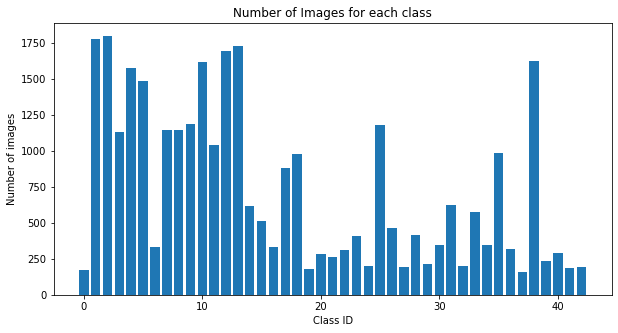

In [43]:
num_of_samples = []
for x in range(0, num_of_class):
    #print(len(np.where(y_train==x)[0]))
    num_of_samples.append(len(np.where(y_train==x)[0]))
print(num_of_samples)
plt.figure(figsize=(10,5))
plt.bar(range(0, num_of_class), num_of_samples)
plt.title("Number of Images for each class")
plt.xlabel("Class ID")
plt.ylabel("Number of images")
plt.show()


In [44]:
def preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img =cv2.equalizeHist(img)
    img = img/255
    return img
#img = preprocessing(X_train[30])
#img = cv2.resize(img, (300,300))
#cv2.imshow("Preprocessed", img)
#cv2.waitKey(0)
X_train= np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_validation = np.array(list(map(preprocessing,X_validation)))

In [45]:
print("************Complete shape details**************")
print("X_train--------------------", X_train.shape)
print("y_train--------------------", y_train.shape)
print("X_validation---------------", X_validation.shape)
print("y_validation---------------", y_validation.shape)

************Complete shape details**************
X_train-------------------- (31367, 32, 32)
y_train-------------------- (31367,)
X_validation--------------- (7842, 32, 32)
y_validation--------------- (7842,)


In [46]:
#Reshaping training data and testing data
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation_reshape = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print("------------Reshaping done----------------")
print("X_train shape after reshaping--------------", X_train_reshape.shape)
print("X_validation shape after reshaping---------", X_validation_reshape.shape)
print("X_test shape after reshaping---------------", X_test_reshape.shape)

------------Reshaping done----------------
X_train shape after reshaping-------------- (31367, 32, 32, 1)
X_validation shape after reshaping--------- (7842, 32, 32, 1)
X_test shape after reshaping--------------- (7842, 32, 32, 1)


In [47]:
#Complete shape view for understanding
print("************Before Complete shape details**************")
print("X_train--------------------", X_train.shape)
print("y_train--------------------", y_train.shape)
print("X_validation---------------", X_validation.shape)
print("y_validation---------------", y_validation.shape)
print('************After reshape*******************************')
print("X_train_reshape------------", X_train_reshape.shape)
print("X_validation_reshape-------", X_validation_reshape.shape)
print("X_test_reshape-------------", X_test_reshape.shape)
print("y_test---------------------", y_test.shape)
print('********************************************************')

************Before Complete shape details**************
X_train-------------------- (31367, 32, 32)
y_train-------------------- (31367,)
X_validation--------------- (7842, 32, 32)
y_validation--------------- (7842,)
************After reshape*******************************
X_train_reshape------------ (31367, 32, 32, 1)
X_validation_reshape------- (7842, 32, 32, 1)
X_test_reshape------------- (7842, 32, 32, 1)
y_test--------------------- (7842,)
********************************************************


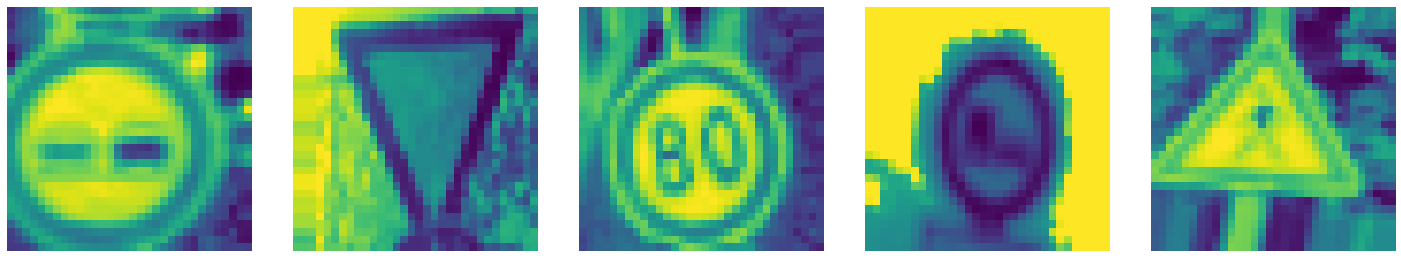

In [48]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train_reshape)
batches= dataGen.flow(X_train_reshape,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREATED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
# TO SHOW AUGUMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,5,figsize=(20,5))
fig.tight_layout()
for i in range(5):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')
plt.show()
 

In [49]:
#One hot encoding(categorical)
y_train_categorical = to_categorical(y_train, classes)
y_test_categorical = to_categorical(y_test, classes)
y_validation_categorical = to_categorical(y_validation, classes)
print('*************Shape Details******************')
print("y_train_categorical shape---------", y_train_categorical.shape)
print("y_test_categorical shape----------", y_test_categorical.shape)
print("y_validation_categorical shape----", y_validation_categorical.shape)
print("********************************************")

*************Shape Details******************
y_train_categorical shape--------- (31367, 43)
y_test_categorical shape---------- (7842, 43)
y_validation_categorical shape---- (7842, 43)
********************************************


In [50]:
#Early stooping for preventing overfitting and underfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,
)
#print("Early stopping", ear)

In [51]:
#Sequential model
def myModel():
    model = Sequential()
    model.add(Conv2D(filters = 60, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
    model.add(Conv2D(filters = 60, kernel_size = (5,5), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(rate = 0.25))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 60//2, kernel_size = (3,3), activation = 'relu'))
    model.add(Conv2D(filters = 60//2, kernel_size = (3,3), activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate = 0.5))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(classes, activation = 'softmax'))
    model.compile (loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model


In [6]:
%reload_ext tensorboard
log_folder = '/home/vijay/Fedora/Music/dash/log'

In [54]:
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]

In [55]:
model = myModel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 60)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 60)        240       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 30)         

#Compile
model.compile (loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print("****************Compile Done********************")

In [58]:
history = model.fit(dataGen.flow(X_train_reshape, y_train_categorical, batch_size= 32),
                    epochs= 20,
                    validation_data=(X_validation_reshape, y_validation_categorical),
                    callbacks=[callbacks,early_stopping],
                    shuffle =1)

Epoch 1/20
981/981 [==============================] - 200s 203ms/step - loss: 3.2281 - accuracy: 0.1875 - val_loss: 0.6022 - val_accuracy: 0.8559
Epoch 2/20
981/981 [==============================] - 215s 219ms/step - loss: 1.1313 - accuracy: 0.6532 - val_loss: 0.1987 - val_accuracy: 0.9370
Epoch 3/20
981/981 [==============================] - 225s 230ms/step - loss: 0.6755 - accuracy: 0.7929 - val_loss: 0.1312 - val_accuracy: 0.9642
Epoch 4/20
981/981 [==============================] - 221s 225ms/step - loss: 0.5088 - accuracy: 0.8436 - val_loss: 0.0739 - val_accuracy: 0.9788
Epoch 5/20
981/981 [==============================] - 225s 229ms/step - loss: 0.4385 - accuracy: 0.8628 - val_loss: 0.0956 - val_accuracy: 0.9700
Epoch 6/20
981/981 [==============================] - 223s 227ms/step - loss: 0.3752 - accuracy: 0.8829 - val_loss: 0.0604 - val_accuracy: 0.9852
Epoch 7/20
981/981 [==============================] - 225s 229ms/step - loss: 0.3318 - accuracy: 0.8960 - val_loss: 0.0531 -

In [7]:
%tensorboard --logdir logs

#Fitting model with augumentation
history=model.fit(dataGen.flow(X_train_reshape,y_train_categorical,batch_size=32),
                            epochs=30,
                            validation_data=(X_validation_reshape,y_validation_categorical),
                            callbacks=[early_stopping],
                            shuffle=1)
print("*****************Training Done******************")

In [60]:
#Save model
#pickle_out = open("model_trained_jul.p","wb")
#pickle.dump(model, pickle_out)
#pickle.out.close()

model.save('./sample/traffic_jul_1.h5')
print("************Model Saved***************")
model.summary()

************Model Saved***************
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 60)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 60)        240       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2

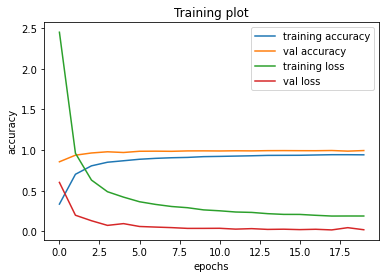

In [61]:
#Plot of training
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Training plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [62]:
#Score prediction for test data
score = model.evaluate(X_test_reshape,y_test_categorical,verbose=2)
print("Training Accuracy-----93.81%")
print("***********Report***************")
print("Accuracy reported-----", round(score[1], 3)*100,"%")
print("Loss reported---------", round(score[0],3))

246/246 - 4s - loss: 0.0203 - accuracy: 0.9939
Training Accuracy-----93.81%
***********Report***************
Accuracy reported----- 99.4 %
Loss reported--------- 0.02


In [63]:
import numpy as np
import pandas as pd
import cv2
from PIL import*
def testing(testcsv):
    df = pd.read_csv(testcsv)
    label = df['ClassId'].values
    imgs = df['Path'].values
    raw = []
    for img in imgs:
        image = Image.open(img)
        #image = image.resize((30,30))
        image = image.convert('L')
        image = image.resize((32,32))
        image = np.array(image)
        image = cv2.equalizeHist(image)
        raw.append(np.array(image))
    processed_image_array = np.array(raw)
    processed_image_array = processed_image_array.reshape(processed_image_array.shape[0],processed_image_array.shape[1],processed_image_array.shape[2],1)
    return processed_image_array, label

In [64]:
processed_image_array, label = testing("Test.csv")

In [65]:
#Prediction demonstration
import tensorflow as tf
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [66]:
#prediction for test folders
predictions = probability_model.predict(processed_image_array)

In [69]:
#prediction  array for first image
print("***********Prediction made for first image in test folder****************")
print(predictions[98])
print("********************Array genearted**************************************")

***********Prediction made for first image in test folder****************
[0.02236222 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222
 0.02236222 0.02236222 0.02236222 0.06078681 0.02236222 0.02236222
 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222
 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222
 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222
 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222
 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222 0.02236222
 0.02236222]
********************Array genearted**************************************


In [71]:
#prediction of label for first image
print("*********************Predicted class of the image******************")
print("Predicted Class of the image:", np.argmax(predictions[98]))
print("----------------------------xxxxx----------------------------------")
#cross verifying with label already given.
print("*********************Actual class of the image was*****************")
print("Actual class of the image", label[98])
print("-----------------------------xxxxx---------------------------------")

*********************Predicted class of the image******************
Predicted Class of the image: 9
----------------------------xxxxx----------------------------------
*********************Actual class of the image was*****************
Actual class of the image 9
-----------------------------xxxxx---------------------------------


In [5]:
import pandas as pd
testcsv='/home/vijay/Fedora/Documents/366pi_project/archive/Test.csv'
df = pd.read_csv(testcsv)
df_label= df['ClassId'].values
df_imgs = df['Path'].values

def image_num(n):
    img = r'/home/vijay/Fedora/Documents/366pi_project/archive/'+df_imgs[n]
    return img

In [6]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
model = load_model('/home/vijay/Fedora/Documents/366pi_project/archive/sample/traffic_jul_1.h5')
def final_predict(img,n):
    # Name extracted from https://en.wikipedia.org/wiki/Road_signs_in_Germany
    name = {
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No Passing (for any vehicle type)', 
    10:'No passing veh over 3.5 tons', 
    11:'Priority to through-traffic at the next intersection/crossroads only', 
    12:'Priority road', 
    13:'Yield to cross traffic', 
    14:'Stop', 
    15:'No vehicles of any kind permitted', 
    16:'Veh > 3.5 tons prohibited', 
    17:'Do Not Enter', 
    18:'General caution', 
    19:'Dangerous curve to the left', 
    20:'Dangerous curve to the right', 
    21:'Double curves, first to left (Slow & stay to the right)', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Construction area', 
    26:'Traffic signals', 
    27:'Pedestrians crossing', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals possible', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right of traffic barrier/divider', 
    39:'Keep left of traffic barrier/divider', 
    40:'Roundabout(Yield to traffic in circle, signal only on exit)', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons' }
    raw=[]
    image = Image.open(img)
    gray = image.convert('L')
    gray = gray.resize((32,32))
    gray = np.array(gray)
    gray = cv2.equalizeHist(gray)
    raw.append(np.array(gray))
    processed_image_array = np.array(raw)
    processed_image_array = processed_image_array.reshape(processed_image_array.shape[0],processed_image_array.shape[1],processed_image_array.shape[2],1)
    Y_pred = np.argmax(model.predict(processed_image_array), axis=-1)
    print("Actual Traffic Sign : ",name[df_label[n]])
    #print("Pricted Sign Class : ", Y_pred)
    print("Predicted traffic sign is:", name[Y_pred[0]])
    plt.imshow(image)
    plt.show()


Actual Traffic Sign :  Speed limit (30km/h)
Predicted traffic sign is: Speed limit (30km/h)


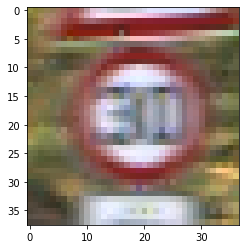

In [9]:
final_predict(image_num(10641),10641)

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  1 10:55:14 2021

@author: vijay
"""

import numpy as np
import cv2
from keras.models import load_model
from PIL import Image
import tensorflow as tf
#from keras import Sequential, Softmax

framewidth = 640
frameheight = 480
brightness = 180
threshold = 0.70
font =  cv2.FONT_HERSHEY_SIMPLEX

cap= cv2.VideoCapture(0) # We can also use any camera here.
cap.set(3,framewidth)
cap.set(4,frameheight)
model = load_model("/home/vijay/Documents/ubuntu/Fedora/Documents/366pi_project/archive/sample/traffic_jul_1.h5")
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
def getClassName(classNo):
    if classNo==0: return 'Speed limit (20km/h)',
    elif classNo==1:return 'Speed limit (30km/h)', 
    elif classNo==2:return 'Speed limit (50km/h)', 
    elif classNo==3:return 'Speed limit (60km/h)', 
    elif classNo==4:return 'Speed limit (70km/h)', 
    elif classNo==5:return 'Speed limit (80km/h)', 
    elif classNo==6:return 'End of speed limit (80km/h)', 
    elif classNo==7:return 'Speed limit (100km/h)', 
    elif classNo==8:return 'Speed limit (120km/h)', 
    elif classNo==9:return 'No Passing (for any vehicle type)', 
    elif classNo==10:return 'No passing veh over 3.5 tons', 
    elif classNo==11:return 'Priority to through-traffic at the next intersection/crossroads only', 
    elif classNo==12:return 'Priority road', 
    elif classNo==13:return 'Yield to cross traffic', 
    elif classNo==14:return 'Stop', 
    elif classNo==15:return 'No vehicles of any kind permitted', 
    elif classNo==16:return 'Veh > 3.5 tons prohibited', 
    elif classNo==17:return 'Do Not Enter', 
    elif classNo==18:return 'General caution', 
    elif classNo==19:return 'Dangerous curve to the left', 
    elif classNo==20:return 'Dangerous curve to the right', 
    elif classNo==21:return 'Double curves, first to left (Slow & stay to the right)', 
    elif classNo==22:return 'Bumpy road', 
    elif classNo==23:return 'Slippery road', 
    elif classNo==24:return 'Road narrows on the right', 
    elif classNo==25:return 'Construction area', 
    elif classNo==26:return 'Traffic signals', 
    elif classNo==27:return 'Pedestrians crossing', 
    elif classNo==28:return 'Children crossing', 
    elif classNo==29:return 'Bicycles crossing', 
    elif classNo==30:return 'Beware of ice/snow',
    elif classNo==31:return 'Wild animals possible', 
    elif classNo==32:return 'End speed + passing limits', 
    elif classNo==33:return 'Turn right ahead', 
    elif classNo==34:return 'Turn left ahead', 
    elif classNo==35:return 'Ahead only', 
    elif classNo==36:return 'Go straight or right', 
    elif classNo==37:return 'Go straight or left', 
    elif classNo==38:return 'Keep right of traffic barrier/divider', 
    elif classNo==39:return 'Keep left of traffic barrier/divider', 
    elif classNo==40:return 'Roundabout(Yield to traffic in circle, signal only on exit)', 
    elif classNo==41:return 'End of no passing', 
    elif classNo==42:return 'End no passing veh > 3.5 tons'
while True:
    success, imgoriginal = cap.read()
    img = np.asarray(imgoriginal)
    img = cv2.resize(img,(32,32))
    img =  preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1,32,32,1)
    cv2.putText(imgoriginal,"CLASS: ", (20,35), font, 0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgoriginal,"PROBABILITY:", (20,75), font, 0.75,(255,0,0),2,cv2.LINE_AA)
    #predict
    classIndex = int(model.predict_classes(img))
    #print(classIndex)
    predictons = model.predict(img)
    probability = np.amax(predictons)
    #print(classIndex,probability)
    if probability>threshold:
        cv2.putText(imgoriginal, str(classIndex)+" "+str(getClassName(classIndex)), (120,35), font, 0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgoriginal, str(round(probability*100,2))+"%",(180,75),font, 0.75, (255,0,0),2,cv2.LINE_AA)
    cv2.imshow("Result", imgoriginal)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

/home/vijay/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Thank you for your valuable time 